In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle 
from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline
%config  InlineBackend.figure_formats = {'png', 'retina'}
sns.set_style("white")

In [3]:
pic_img_src = glob.glob('../Dataset/pic_face/*.png')
real_img_src = glob.glob('../Dataset/real_face/*.png')

pic_img_src[1], real_img_src[1]

('../Dataset/pic_face/Screenshot 2018-08-07 20.53.17.png',
 '../Dataset/real_face/backhyun.png')

In [10]:
class Image():
    def __init__(self, img_src):
        # type(img_src) == "string"
        self.img_src = img_src
        self.color_image_vector = self.png_to_vector()
        self.gray_image_vector = self.color_to_gray()
        if img_src[-4] == "1":
            self.sex = "female"
        else :
            self.sex = "male"
    def __repr__(self):
        return "Image"
    
    def __str__(self):
        return "Image"
            
    def png_to_vector(self):
        image_vector = cv2.imread(self.img_src)
        return image_vector
    def color_to_gray(self):
        gray_image = cv2.cvtColor(self.color_image_vector, cv2.COLOR_BGR2GRAY)
        return gray_image

def image_print(img=None, figsize=(7,7), axis="off", color="RGB"):
    """ when image loaded through openCV, set color on RGB and print it 
    Args:
    img = vectorized image (color, RGB encoded)
    figsize = tuple or list object, it refers figure's size, defalut = (7,7)
    axis = "on", "off", defalut = "off"
    color = "RGB" or "gray", default="RGB"
    Return :
    printing image 
    """
    import numpy 
    if type(img) != numpy.ndarray:
        raise ValueError
#             print("img는 Numpy의 ndarray 이어야 합니다.")
    
    plt.figure(figsize=figsize)
    plt.axis(axis)
    if color == "RGB":
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(img, cmap='gray')
    plt.show()
    return None

def resizing_image(img, size=(300, 300), interpolation=cv2.INTER_CUBIC):
    """resizing image size (cv2 has to be imported)
    Args :
    img = vectorized image (color, RGB encoded)
    size = tuple or list, size of output image, default=(300, 300)
    interpolation = how to interpolate, cv2's interpolation, default=cv2.INTER_CUBIC
    
    Return :
    resized image vector
    """
    img = cv2.resize(img, dsize=size, interpolation=cv2.INTER_CUBIC)
    return img


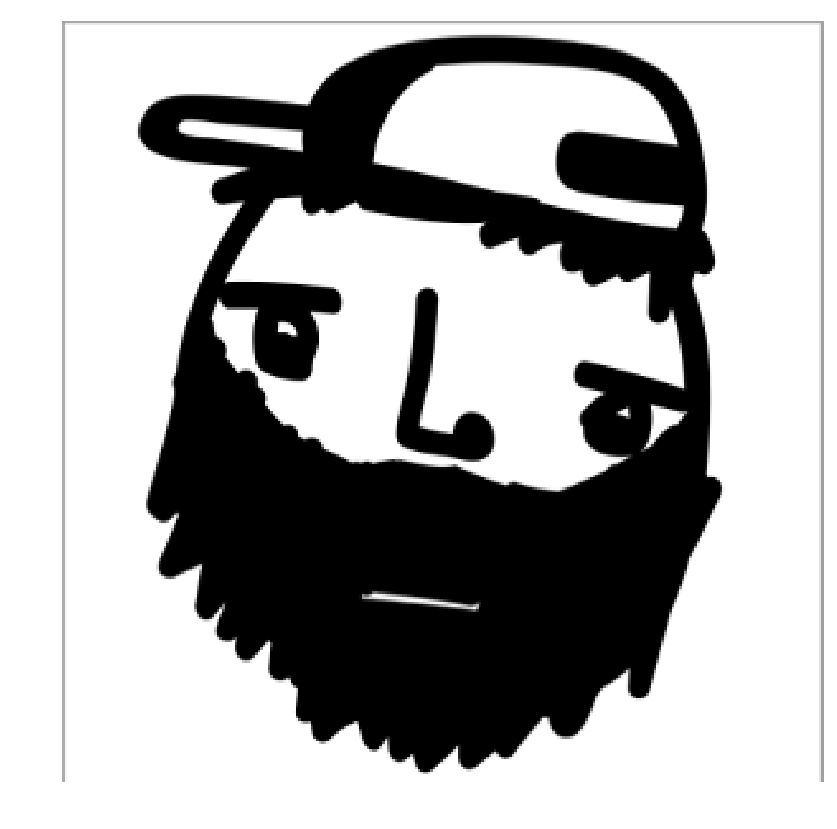

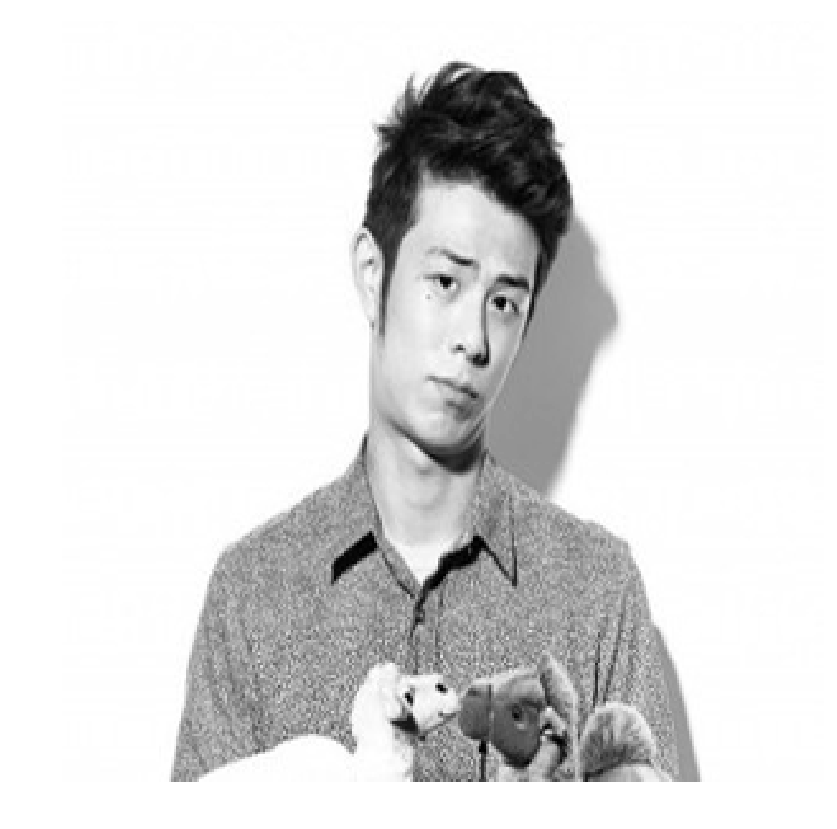

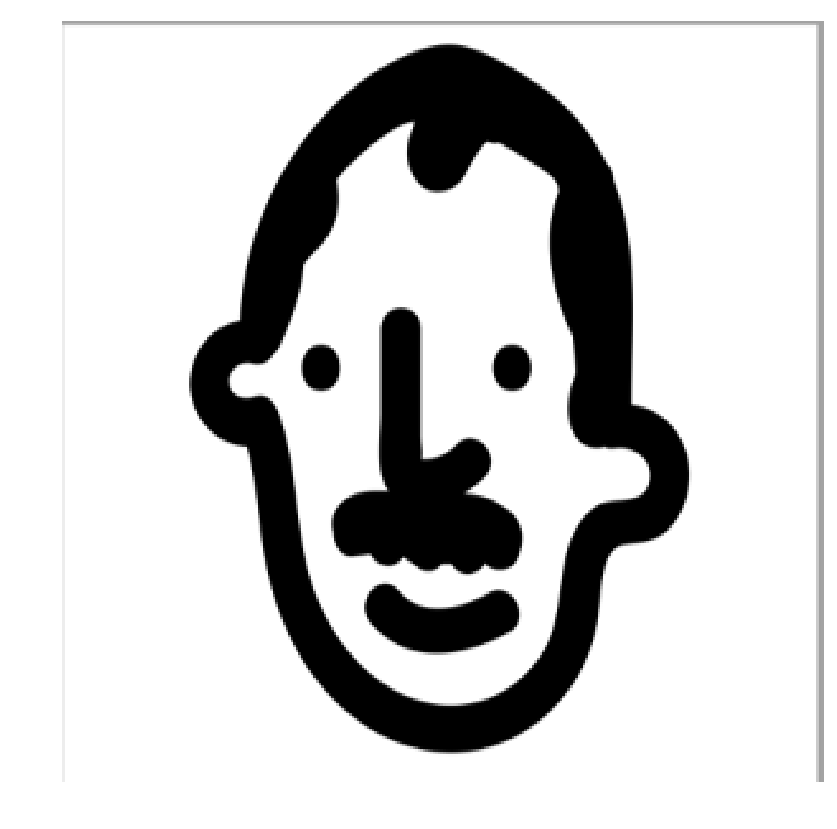

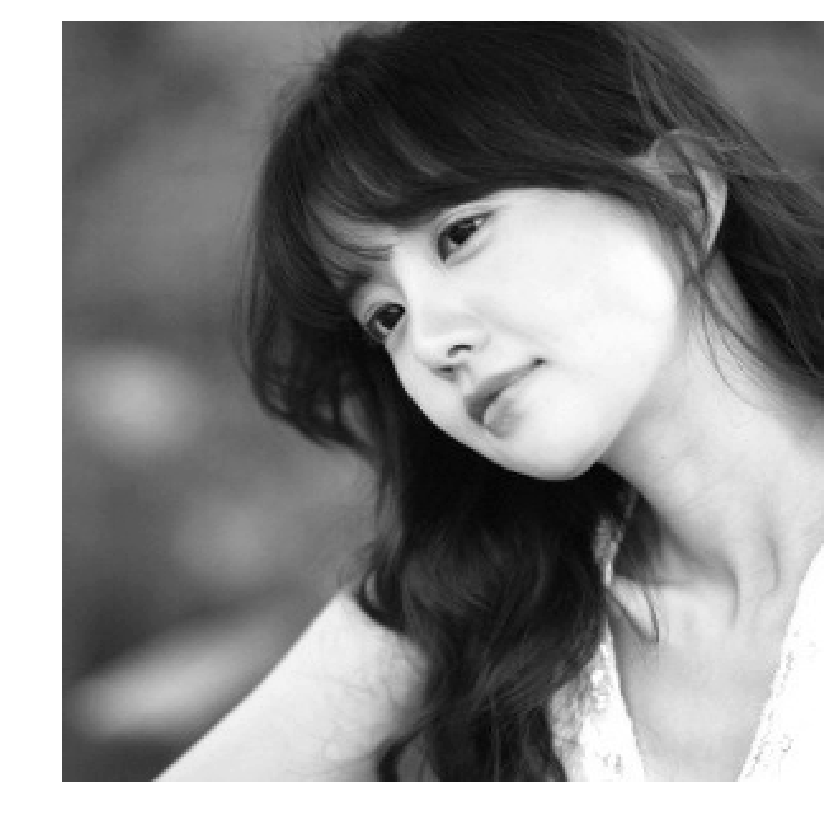

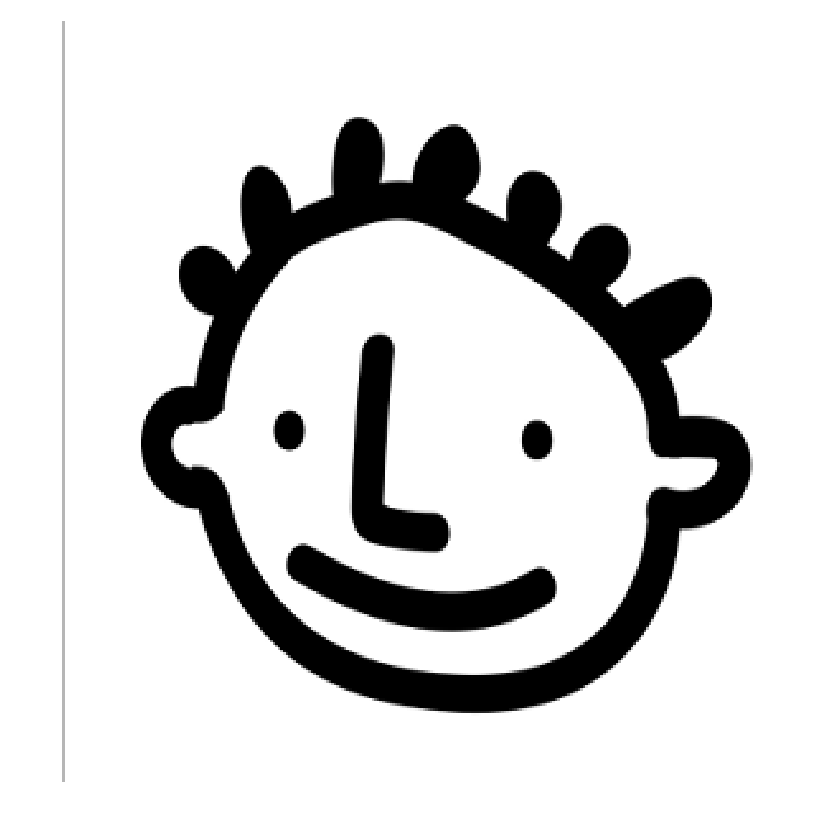

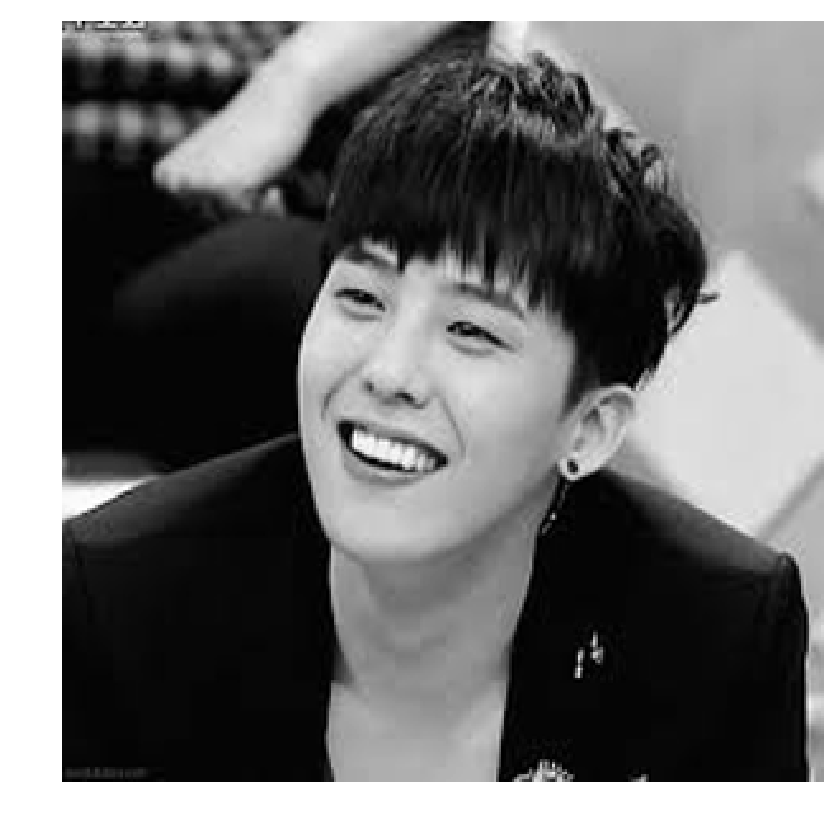

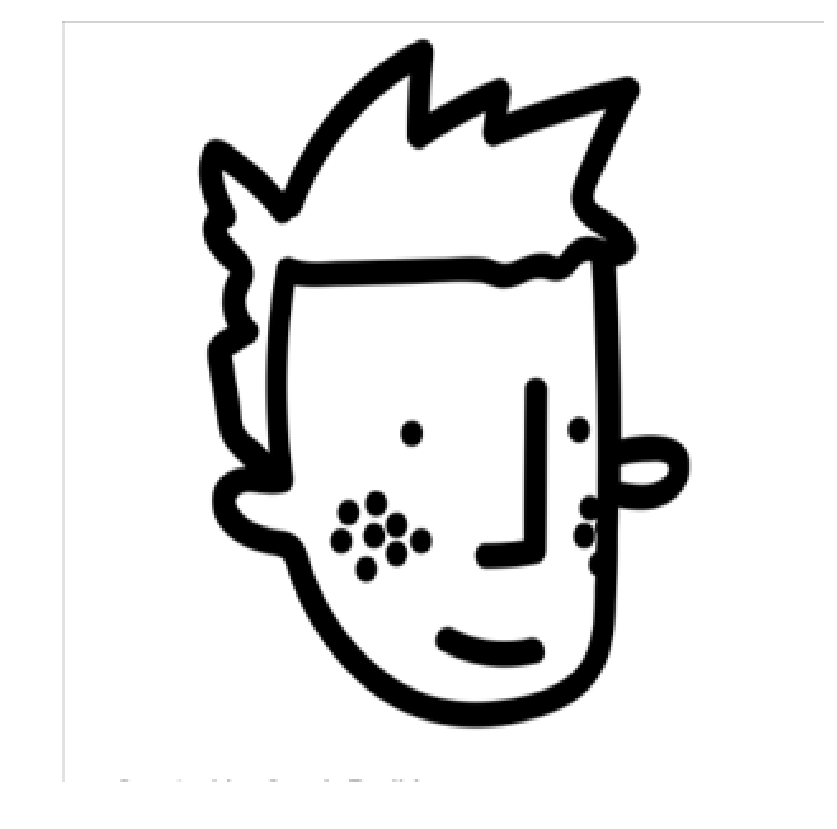

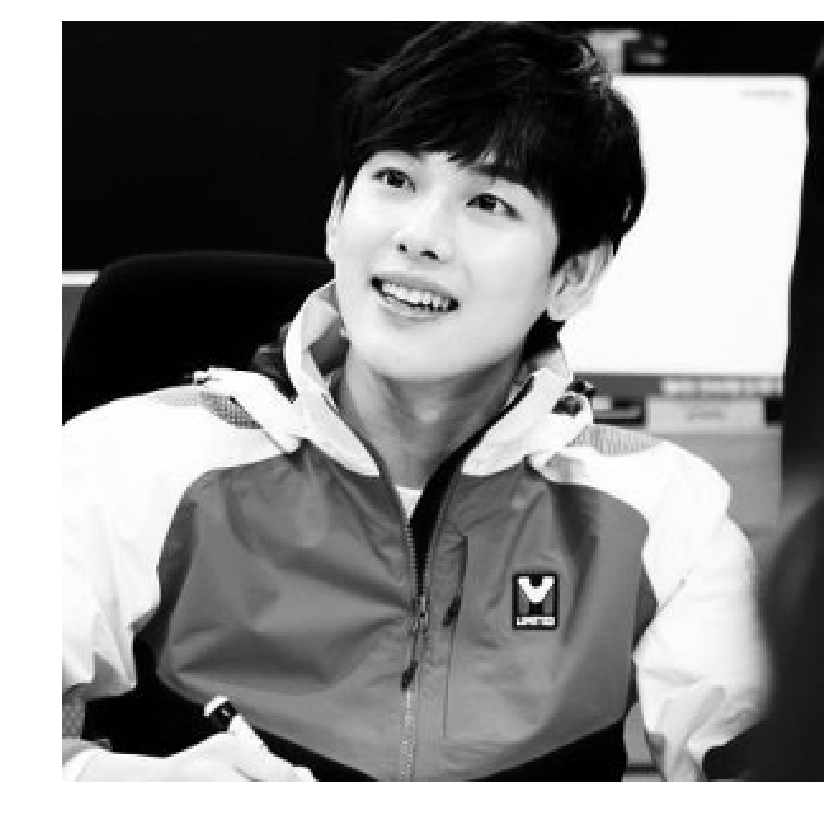

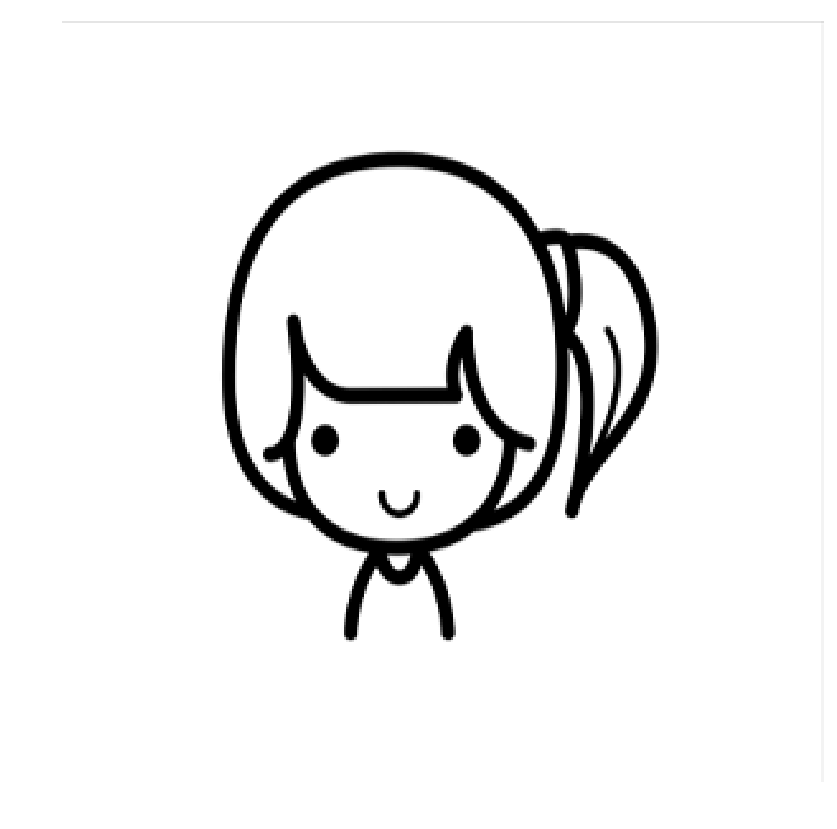

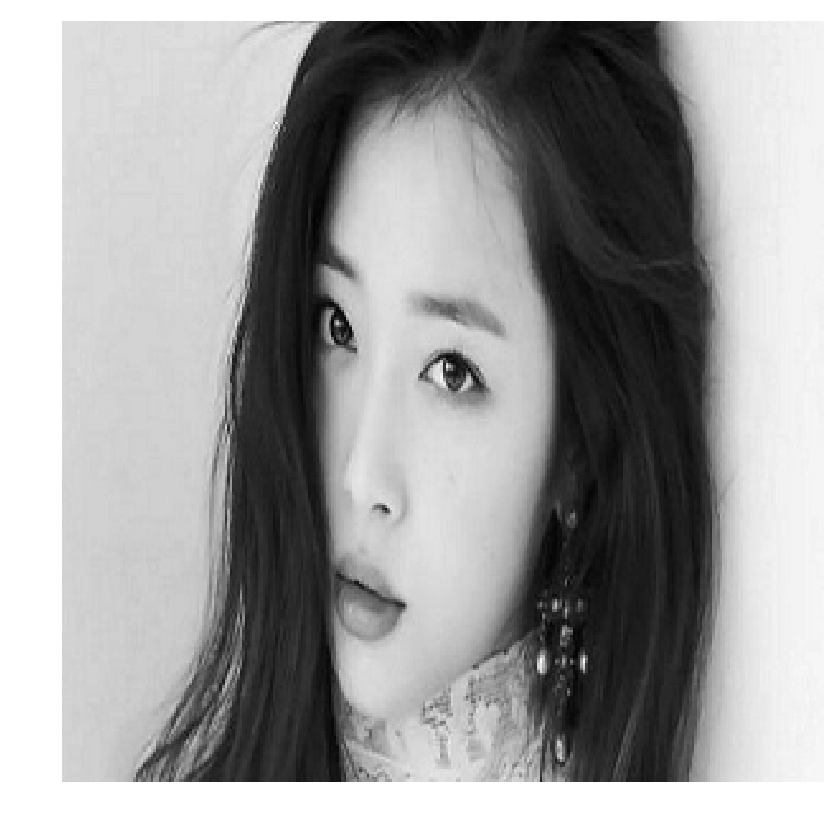

In [12]:
random_display = np.random.randint(0,len(real_img_src), 5)

pic_resized_img = {}
real_resized_img = {}
for ix, psrc, rsrc in zip(range(len(pic_img_src)), pic_img_src, real_img_src):
    
    pimg = Image(psrc)
    rimg = Image(rsrc)
    pic_resized_img[ix] = resizing_image(pimg.gray_image_vector)
    real_resized_img[ix] = resizing_image(rimg.gray_image_vector)
    if ix in random_display:
        image_print(pic_resized_img[ix], color="gray")
        image_print(real_resized_img[ix], color="gray")

In [10]:
# # make pickle 
# with open("../pickle/org_df.bin", 'wb') as f:
#     pickle.dump(df, f)

# read pickle file
with open("../pickle/org_df.bin", "rb") as f:
    df = pickle.load(f)

size of input image = 250 * 550